In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
world_cups = pd.read_csv('WorldCups.csv')

In [4]:
print("WorldCupMatches:")
print(matches.head())

WorldCupMatches:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0   

In [5]:
print("\nWorldCupPlayers:")
print(players.head())


WorldCupPlayers:
   RoundID  MatchID Team Initials           Coach Name Line-up  Shirt Number  \
0      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
1      201     1096           MEX     LUQUE Juan (MEX)       S             0   
2      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
3      201     1096           MEX     LUQUE Juan (MEX)       S             0   
4      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   

        Player Name Position Event  
0       Alex THEPOT       GK   NaN  
1   Oscar BONFIGLIO       GK   NaN  
2  Marcel LANGILLER      NaN  G40'  
3      Juan CARRENO      NaN  G70'  
4   Ernest LIBERATI      NaN   NaN  


In [6]:
print("\nWorldCups:")
print(world_cups.head())


WorldCups:
   Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607  


Checking for missing values

In [7]:
print("\nMissing values in WorldCupMatches:")
print(matches.isnull().sum())


Missing values in WorldCupMatches:
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64


In [8]:
print("\nMissing values in WorldCupPlayers:")
print(players.isnull().sum())


Missing values in WorldCupPlayers:
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64


In [9]:
print("\nMissing values in WorldCups:")
print(world_cups.isnull().sum())


Missing values in WorldCups:
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64


In [10]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'], errors='coerce')

In [11]:
matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']
matches['Goal Difference'] = matches['Home Team Goals'] - matches['Away Team Goals']

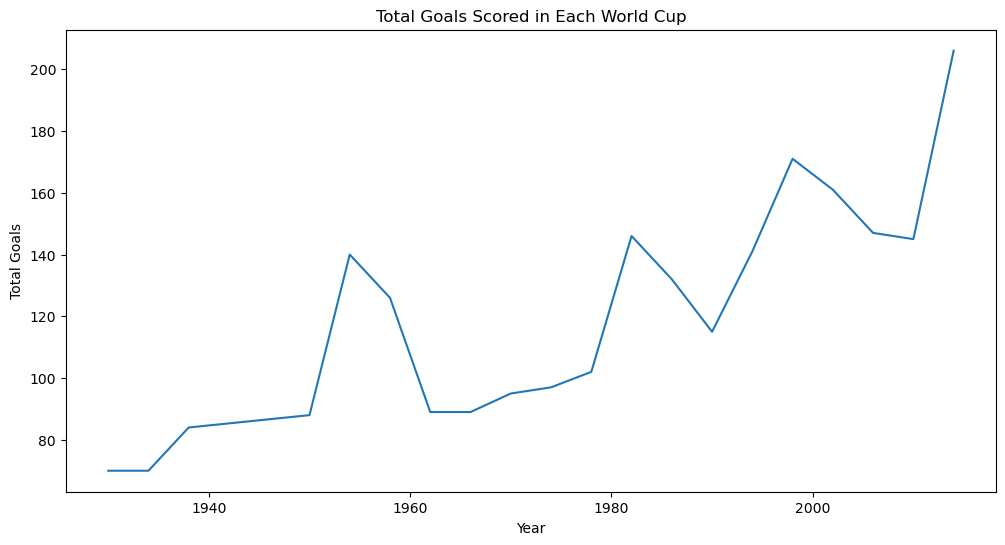

In [12]:
# Total goals scored in each World Cup
goals_per_cup = matches.groupby('Year')['Total Goals'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=goals_per_cup, x='Year', y='Total Goals')
plt.title('Total Goals Scored in Each World Cup')
plt.show()

In [18]:
world_cups['Attendance'] = pd.to_numeric(world_cups['Attendance'], errors='coerce')
world_cups['MatchesPlayed'] = pd.to_numeric(world_cups['MatchesPlayed'], errors='coerce')

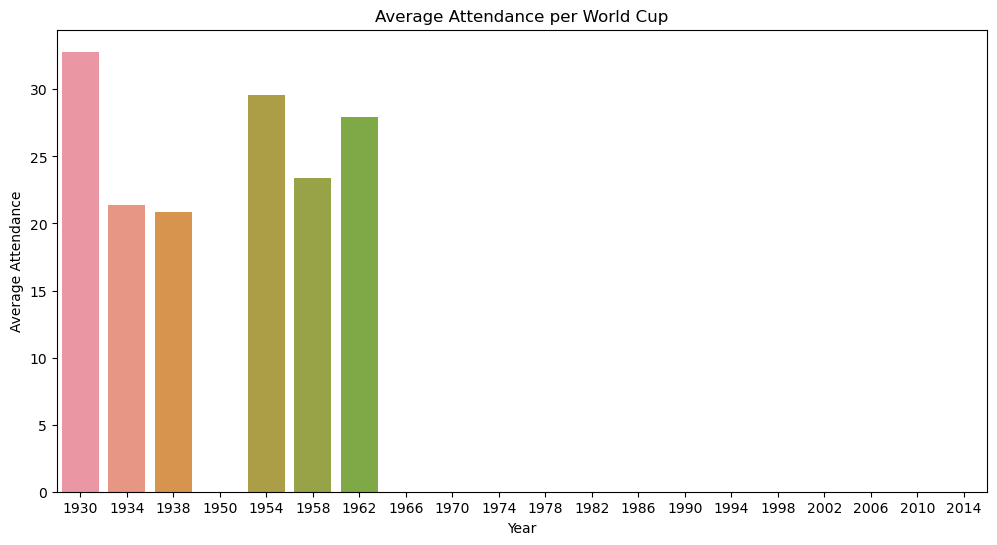

In [19]:
# Average attendance per World Cup
average_attendance = world_cups[['Year', 'Attendance']].copy()
average_attendance['Average Attendance'] = average_attendance['Attendance'] / world_cups['MatchesPlayed']

plt.figure(figsize=(12, 6))
sns.barplot(data=average_attendance, x='Year', y='Average Attendance')
plt.title('Average Attendance per World Cup')
plt.show()

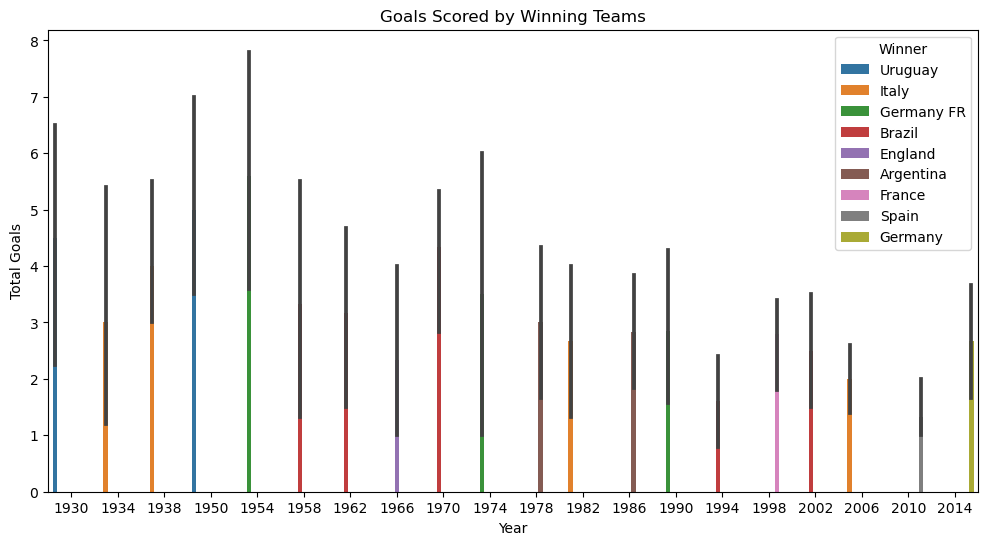

In [14]:
# Goals scored by winning teams
winners_goals = world_cups[['Year', 'Winner', 'GoalsScored']].copy()
winners_goals = winners_goals.merge(matches, left_on=['Year', 'Winner'], right_on=['Year', 'Home Team Name'])

plt.figure(figsize=(12, 6))
sns.barplot(data=winners_goals, x='Year', y='Total Goals', hue='Winner')
plt.title('Goals Scored by Winning Teams')
plt.show()

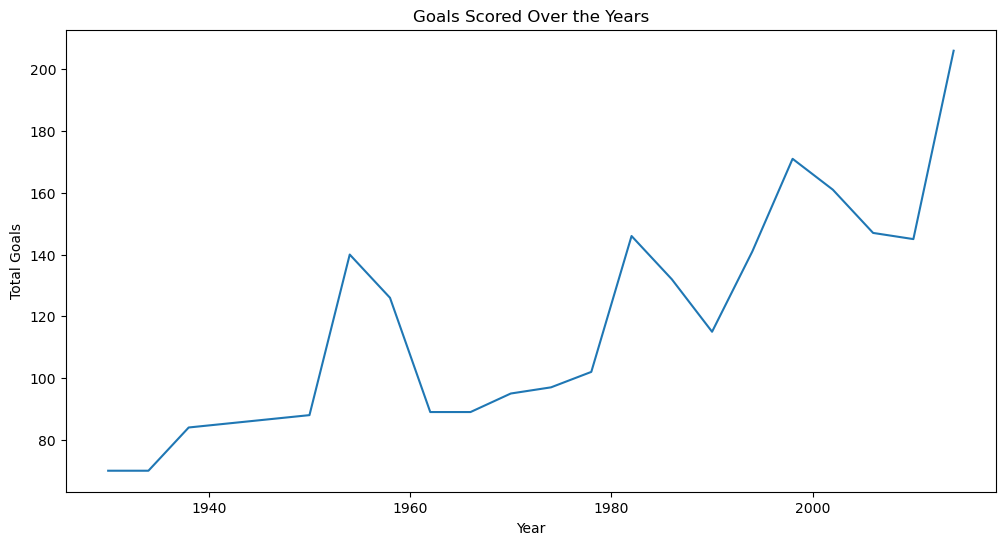

In [15]:
# Goals scored over the years
goals_by_year = matches.groupby('Year')['Total Goals'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=goals_by_year, x='Year', y='Total Goals')
plt.title('Goals Scored Over the Years')
plt.show()

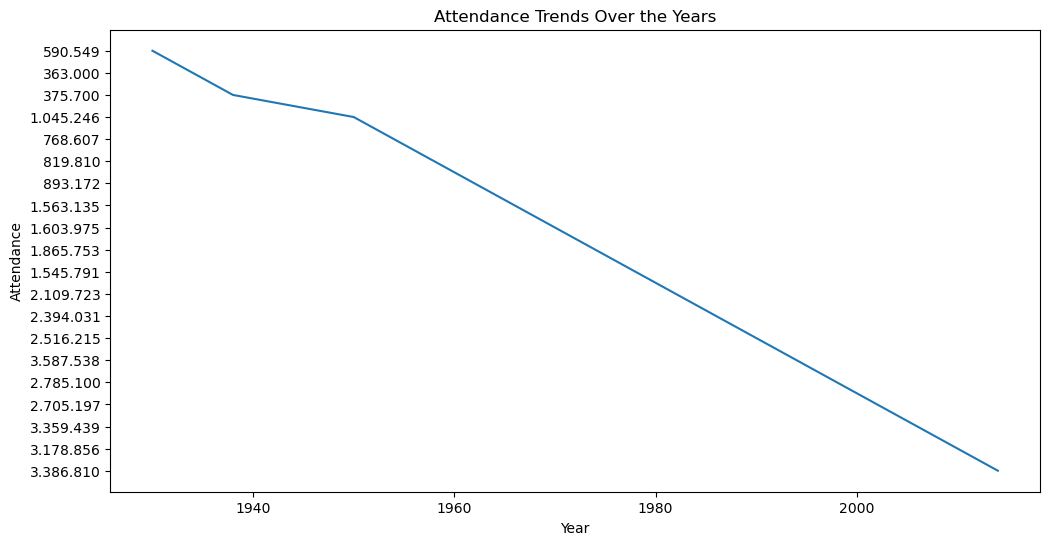

In [16]:
# Attendance trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups, x='Year', y='Attendance')
plt.title('Attendance Trends Over the Years')
plt.show()

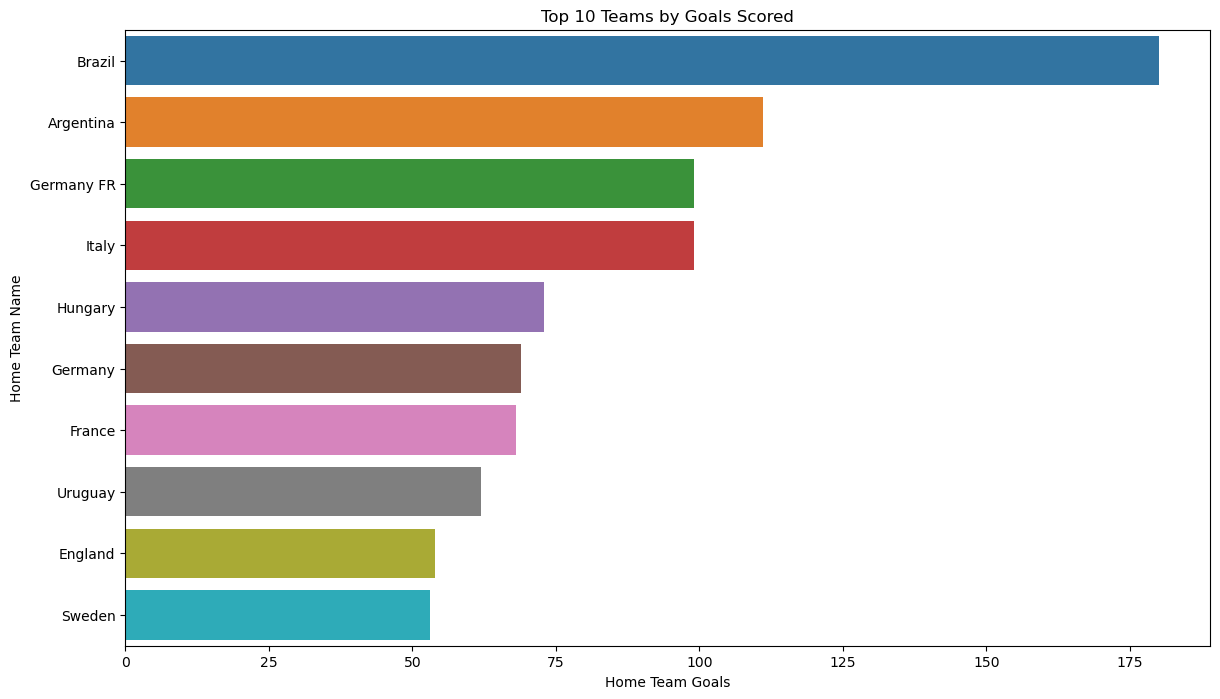

In [17]:
# Performance of top teams
top_teams = matches.groupby('Home Team Name')['Home Team Goals'].sum().reset_index().sort_values(by='Home Team Goals', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_teams, x='Home Team Goals', y='Home Team Name')
plt.title('Top 10 Teams by Goals Scored')
plt.show()